# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset

In [2]:
!ls ./processed_data/processed

segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord
segment-10023947602400723454_1120_000_1140_000_with_camera_labels.tfrecord
segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord
segment-10061305430875486848_1080_000_1100_000_with_camera_labels.tfrecord
segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord
segment-10072231702153043603_5725_000_5745_000_with_camera_labels.tfrecord
segment-10075870402459732738_1060_000_1080_000_with_camera_labels.tfrecord
segment-10082223140073588526_6140_000_6160_000_with_camera_labels.tfrecord
segment-10094743350625019937_3420_000_3440_000_with_camera_labels.tfrecord
segment-10096619443888687526_2820_000_2840_000_with_camera_labels.tfrecord
segment-10107710434105775874_760_000_780_000_with_camera_labels.tfrecord
segment-10153695247769592104_787_000_807_000_with_camera_labels.tfrecord
segment-10206293520369375008_2796_800_2816_800_with_camera_labels.tfrecord
segment-10212406498497081993_5

In [3]:
dataset = get_dataset("./processed_data/processed/segment-10212406498497081993_5300_000_5320_000_with_camera_labels.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['./processed_data/processed/segment-10212406498497081993_5300_000_5320_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./processed_data/processed/segment-10212406498497081993_5300_000_5320_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline

def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    
    input:
        batch    a list with dict format
    """
    # ADD CODE HERE
    entries = list(batch)
    n = len(entries) // 2
    fig, axs = plt.subplots(n, 2, figsize=(15,30))
    colormap = {1: [1, 0, 0], 2: [0, 0, 1], 4: [0, 1, 0]}
    
    for i,entry in enumerate(entries):
        img  = entry['image']
        h, w = entry['original_image_spatial_shape']
        boxes = entry['groundtruth_boxes']
        classes = entry['groundtruth_classes']
        axs[i//2, i%2].axis('off')
        axs[i//2, i%2].imshow(img)
        
        for cl, bb in zip(classes, boxes):
            y1, x1, y2, x2 = (int(bb[0]*h), int(bb[1]*w),
                              int(bb[2]*h), int(bb[3]*w))
            rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', 
                            edgecolor=colormap[cl])
            axs[i//2, i%2].add_patch(rec)
            
    plt.tight_layout()    
        
            

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

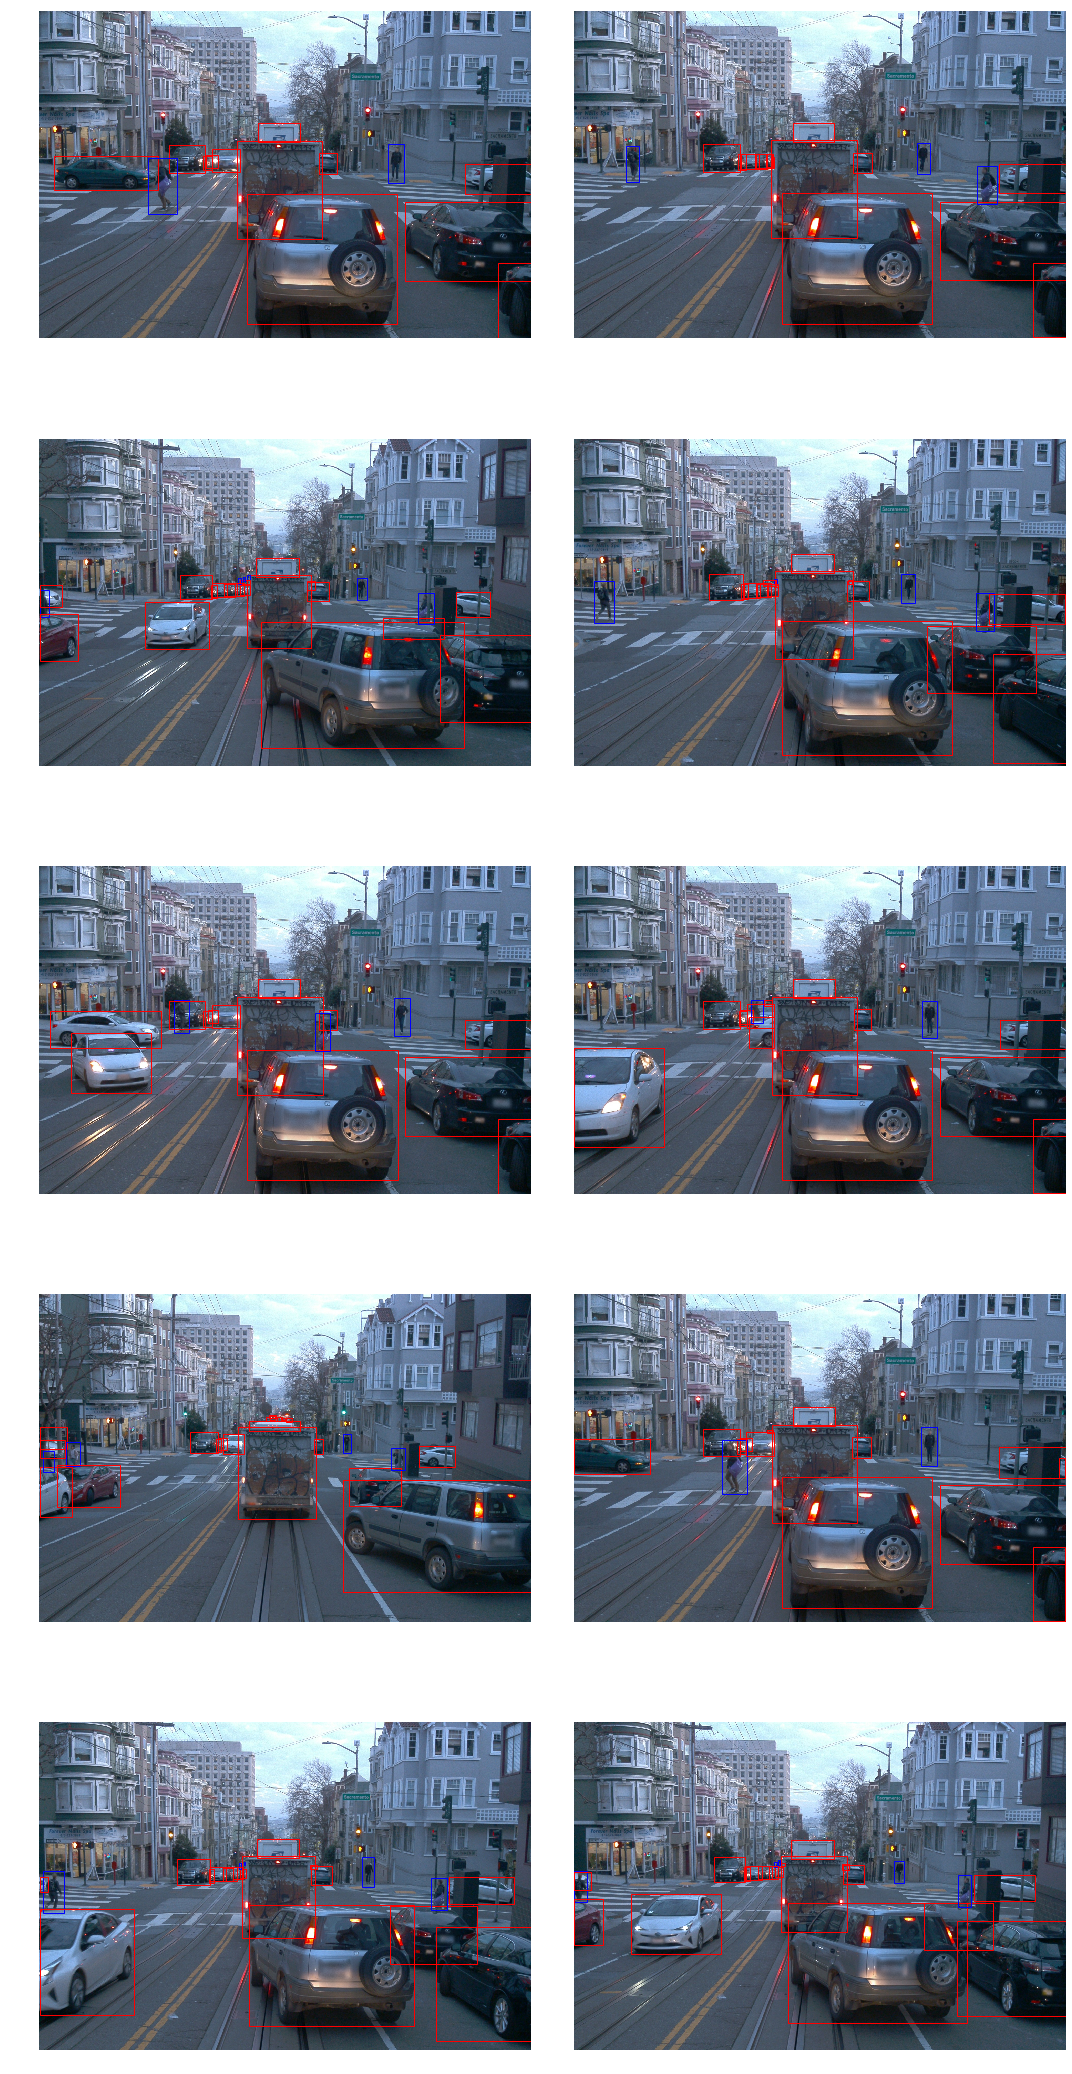

In [5]:
batch = dataset.shuffle(20).take(10).as_numpy_iterator()
display_instances(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

## Count the number of each class

In [6]:
from collections import Counter
import numpy as np

def count_class(batch):
    res = Counter()
    for i,entry in enumerate(batch):
        classes = entry['groundtruth_classes']
        res += Counter(classes)
        
    return res

In [8]:
import glob
import pandas as pd
import re

res = []
seg = []
for fpath in glob.glob("./processed_data/processed/*.tfrecord"):
    dataset = get_dataset(fpath)
    batch = dataset.shuffle(500).take(500).as_numpy_iterator()
    count = count_class(batch)
    
    m = re.search('segment-\d*.*',fpath)
    seg.append(m[0])
    res.append(count)

INFO:tensorflow:Reading unweighted datasets: ['./processed_data/processed/segment-10094743350625019937_3420_000_3440_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./processed_data/processed/segment-10094743350625019937_3420_000_3440_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./processed_data/processed/segment-11718898130355901268_2300_000_2320_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./processed_data/processed/segment-11718898130355901268_2300_000_2320_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./processed_data/processed/segment-10275144660749673822_5755_561_5775_561_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./processed_data/processed/segment-10275144660749673822_5755_561_5775_5

INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./processed_data/processed/segment-11967272535264406807_580_000_600_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./processed_data/processed/segment-11967272535264406807_580_000_600_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./processed_data/processed/segment-11674150664140226235_680_000_700_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./processed_data/processed/segment-11674150664140226235_680_000_700_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./processed_data/processed/segment-10231929575853664160_1160_000_1180_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./processed_data/processed/segme

INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./processed_data/processed/segment-11486225968269855324_92_000_112_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./processed_data/processed/segment-11486225968269855324_92_000_112_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./processed_data/processed/segment-11070802577416161387_740_000_760_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./processed_data/processed/segment-11070802577416161387_740_000_760_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./processed_data/processed/segment-11489533038039664633_4820_000_4840_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./processed_data/processed/segment

INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./processed_data/processed/segment-1022527355599519580_4866_960_4886_960_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./processed_data/processed/segment-1022527355599519580_4866_960_4886_960_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./processed_data/processed/segment-10391312872392849784_4099_400_4119_400_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./processed_data/processed/segment-10391312872392849784_4099_400_4119_400_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./processed_data/processed/segment-11355519273066561009_5323_000_5343_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./processed_data/processed

INFO:tensorflow:Reading record datasets for input file: ['./processed_data/processed/segment-10498013744573185290_1240_000_1260_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./processed_data/processed/segment-10526338824408452410_5714_660_5734_660_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./processed_data/processed/segment-10526338824408452410_5714_660_5734_660_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./processed_data/processed/segment-10927752430968246422_4940_000_4960_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./processed_data/processed/segment-10927752430968246422_4940_000_4960_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./processed_data/process

INFO:tensorflow:Reading unweighted datasets: ['./processed_data/processed/segment-11199484219241918646_2810_030_2830_030_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./processed_data/processed/segment-11199484219241918646_2810_030_2830_030_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./processed_data/processed/segment-10072231702153043603_5725_000_5745_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./processed_data/processed/segment-10072231702153043603_5725_000_5745_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./processed_data/processed/segment-10212406498497081993_5300_000_5320_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./processed_data/processed/segment-10212406498497081993_5300_000_5320_0

In [9]:
pd.set_option('display.max_rows', None)

count = pd.DataFrame()
for idx, row in zip(seg[1:], res[1:]):
    temp = pd.DataFrame(row, index=[idx])
    count = pd.concat([count, temp])
count = count.fillna(0)
count.columns = ["car", "pedestrian", "cyclist"]
count

car  pedestrian  cyclist
segment-11718898130355901268_2300_000_2320_000_...   7794      7739.0    487.0
segment-10275144660749673822_5755_561_5775_561_...   4718       157.0      0.0
segment-12200383401366682847_2552_140_2572_140_...   3397         0.0      0.0
segment-12179768245749640056_5561_070_5581_070_...   5615       359.0      0.0
segment-12012663867578114640_820_000_840_000_wi...  14248      2116.0      0.0
segment-10770759614217273359_1465_000_1485_000_...  15526         0.0      0.0
segment-11060291335850384275_3761_210_3781_210_...   2725        93.0      0.0
segment-10588771936253546636_2300_000_2320_000_...  10661      1145.0      0.0
segment-11017034898130016754_697_830_717_830_wi...   4103       145.0    243.0
segment-10975280749486260148_940_000_960_000_wi...   2858         0.0      0.0
segment-11252086830380107152_1540_000_1560_000_...   5552     14474.0      0.0
segment-11343624116265195592_5910_530_5930_530_...  10537       429.0      0.0
segment-1208303279778032257_1360_000_1380_000_w...   4881         0.0      0.0
segment-10786629299947667143_3440_000_3460_000_...  10286         0.0      0.0
segment-10235335145367115211_5420_000_5440_000_...  16875       513.0     64.0
segment-10517728057304349900_3360_000_3380_000_...   1639         0.0      0.0
segment-10596949720463106554_1933_530_1953_530_...   5870         0.0    176.0
segment-10793018113277660068_2714_540_2734_540_...   7367       402.0     48.0
segment-11967272535264406807_580_000_600_000_wi...   9601      9196.0     45.0
segment-11674150664140226235_680_000_700_000_wi...  15696      6546.0    359.0
segment-10231929575853664160_1160_000_1180_000_...  15191      4703.0     99.0
segment-11076364019363412893_1711_000_1731_000_...   3108         0.0      0.0
segment-1191788760630624072_3880_000_3900_000_w...   9298         0.0      0.0
segment-1083056852838271990_4080_000_4100_000_w...   9394       283.0      0.0
segment-10724020115992582208_7660_400_7680_400_...   1222       113.0    279.0
segment-11113047206980595400_2560_000_2580_000_...   3349     17518.0    500.0
segment-10964956617027590844_1584_680_1604_680_...   1128       261.0    350.0
segment-10075870402459732738_1060_000_1080_000_...   7360         0.0      0.0
segment-1051897962568538022_238_170_258_170_wit...   7728       414.0      0.0
segment-10584247114982259878_490_000_510_000_wi...   2885         0.0      0.0
segment-10963653239323173269_1924_000_1944_000_...  14910      2189.0      0.0
segment-11799592541704458019_9828_750_9848_750_...  14398      1054.0      0.0
segment-10599748131695282446_1380_000_1400_000_...   6976      7488.0      0.0
segment-11004685739714500220_2300_000_2320_000_...    312       625.0      0.0
segment-10023947602400723454_1120_000_1140_000_...  11249      9793.0     76.0
segment-10153695247769592104_787_000_807_000_wi...  16202         0.0      0.0
segment-11623618970700582562_2840_367_2860_367_...    958         0.0      0.0
segment-11486225968269855324_92_000_112_000_wit...   6522        26.0      0.0
segment-11070802577416161387_740_000_760_000_wi...  13497     18618.0      0.0
segment-11489533038039664633_4820_000_4840_000_...   1312      1089.0      0.0
segment-10676267326664322837_311_180_331_180_wi...   6198       108.0     59.0
segment-11454085070345530663_1905_000_1925_000_...   3159         0.0      0.0
segment-1172406780360799916_1660_000_1680_000_w...   6012       621.0      0.0
segment-11119453952284076633_1369_940_1389_940_...   4003       157.0      0.0
segment-10923963890428322967_1445_000_1465_000_...  15141         0.0      0.0
segment-10485926982439064520_4980_000_5000_000_...  13137     16577.0    218.0
segment-10327752107000040525_1120_000_1140_000_...   6075         0.0      0.0
segment-11318901554551149504_520_000_540_000_wi...  16629      5832.0     91.0
segment-11126313430116606120_1439_990_1459_990_...   3613       494.0      0.0
segment-1146261869236413282_1680_000_1700_000_w...  10005      5051.0    337.0
segment-11918003324473417

In [10]:
count.sum()

car           877618.0
pedestrian    262328.0
cyclist         6689.0
dtype: float64

In [11]:
batch = dataset.shuffle(1000).take(1000).as_numpy_iterator()
class_count = count_class(batch)

In [12]:
count = np.array(list(class_count.values()))
count/np.sum(count)

array([0.83733254, 0.16266746])

## Size of the bounding box of each class

In [13]:
def accumulate_box(batch):
    
    res = {1:[], 2:[], 4:[]}
    for i,entry in enumerate(batch):
        boxes = entry['groundtruth_boxes']
        classes = entry['groundtruth_classes']
        
        for cl, bb in zip(classes, boxes):
            res[cl].append([bb[2]-bb[0], bb[3]-bb[1]])
        
        
    return res

In [14]:
accumulate_box(dataset.shuffle(1).take(1).as_numpy_iterator())

{1: [[0.020724058, 0.01184231],
  [0.037994146, 0.012829155],
  [0.08733708, 0.058882594],
  [0.022796452, 0.007927775],
  [0.099672794, 0.08289619],
  [0.123357415, 0.107896626],
  [0.045642287, 0.031250536],
  [0.033059776, 0.018421382],
  [0.02368462, 0.013816029],
  [0.02368462, 0.0072369576],
  [0.03898096, 0.015789747],
  [0.046875834, 0.05526413],
  [0.15839082, 0.17352253],
  [0.049836427, 0.04243493],
  [0.042928398, 0.03602034],
  [0.11348885, 0.120725796],
  [0.033059776, 0.023026705]],
 2: [[0.0074014664, 0.0069080144],
  [0.017763436, 0.004934311],
  [0.050658792, 0.012171268]],
 4: []}